In [2]:
from google.colab import files
files.upload()

Saving gesture-32data.save to gesture-32data.save


Your cell size is close to the size limit (9M). Large new outputs may be dropped. So far, 11.8M of output have been discarded. 

In [3]:
!ls

data_file_name.json  gesture-32data.save		  test-32data.save
datalab		     test-32data-fastward-onlylabel.save


In [0]:
import json
import pickle

import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
from keras.layers import *
from keras.models import Sequential
from keras.models import model_from_json
from keras.optimizers import Adam

np.random.seed(1234)

In [0]:
def get_image_data_gesture(num_training=1000, num_validation=0, num_test=202):
    """
    Load the image dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.
    """
    # Load the raw image data
    image_dir = "gesture-32data.save"

    data = pickle.load(open(image_dir, 'rb'))
    X_train, y_train, X_test, y_test = data['label'][:1000],data['gesture'][:1000],data['label'][1000:],data['gesture'][1000:]
    X_train=np.array(X_train,'float64')
    y_train= np.array(y_train,'float64')
    X_test=np.array(X_test,'float64')
    y_test=np.array(y_test,'float64')
    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]
   

    # Normalize the data: subtract the mean image
    #mean_image = np.mean(X_train, axis=0)
    #X_train -= mean_image
    #X_val -= mean_image
    #X_test -= mean_image

    return X_train, y_train, X_val, y_val, X_test, y_test
  
  
def get_image_data(num_training=63000, num_validation=1000, num_test=10000):
    """
    Load the image dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.
    """
    # Load the raw image data
    image_dir = "test-32data.save"

    data = pickle.load(open(image_dir, 'rb'))
    X_train, y_train, X_test, y_test = data['data'][:80000],data['label'][:80000],data['data'][80000:],data['label'][80000:]
    X_train=np.array(X_train,'float64')
    y_train= np.array(y_train,'float64')
    X_test=np.array(X_test,'float64')
    y_test=np.array(y_test,'float64')
    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    return X_train, y_train, X_val, y_val, X_test, y_test
  
def calculate_error(label1,label2):

  square_error = np.square(np.array(label1) - np.array(label2))

  error_sum=np.sum(square_error)/square_error.size

  return np.sqrt(error_sum) 

In [54]:

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_image_data()
y_train=y_train.reshape(-1,42)
y_val=y_val.reshape(-1,42)
y_test=y_test.reshape(-1,42)
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config))

model = Sequential([
    Convolution2D(
        nb_filter=12,
        nb_row=5,
        nb_col=5,
        subsample=(2, 2),
        input_shape=(32, 32, 3)
    ),
    LeakyReLU(
        alpha=0.05
    ),
    Convolution2D(
        nb_filter=12,
        nb_row=5,
        nb_col=5,
        subsample=(2, 2),
    ),
    LeakyReLU(
        alpha=0.05
    ),
    Convolution2D(
        nb_filter=12,
        nb_row=5,
        nb_col=5,
    ),
    LeakyReLU(
        alpha=0.05
    ),
    Flatten(),
    Dense(
        output_dim=1024,
        activation='relu'
    ),
    Dense(
        output_dim=1024,
        activation='relu'
    ),
#         Dense(
#             output_dim=30,
#         ),
    Dense(
        output_dim=42,
#             weights=(pca_eigenvectors, pca_mean),
        trainable=False
    )
])

model.compile(
    optimizer=Adam(),
    loss='mse'
)

model.fit(
    X_train,
    y_train,
    batch_size=100,
    epochs=30,
)

Train data shape:  (63000, 32, 32, 3)
Train labels shape:  (63000, 42)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000, 42)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 42)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(input_shape=(32, 32, 3..., kernel_size=(5, 5), filters=12, strides=(2, 2))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(kernel_size=(5, 5), filters=12, strides=(2, 2))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(kernel_size=(5, 5), filters=12)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1024)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1024)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: UserWarning: Update your `Dense` call to the Keras 2 API:

Epoch 1/30
63000/63000 [==============================] - 8s 133us/step - loss: 12.8719
Epoch 2/30
63000/63000 [==============================] - 8s 132us/step - loss: 5.0300
Epoch 3/30
63000/63000 [==============================] - 8s 123us/step - loss: 3.8385
Epoch 4/30
39400/63000 [=================>............] - ETA: 2s - loss: 3.2598

63000/63000 [==============================] - 8s 122us/step - loss: 3.1839
Epoch 5/30
63000/63000 [==============================] - 8s 126us/step - loss: 2.8178
Epoch 6/30
63000/63000 [==============================] - 8s 123us/step - loss: 2.4924
Epoch 7/30
58100/63000 [==========================>...] - ETA: 0s - loss: 2.2145

63000/63000 [==============================] - 8s 122us/step - loss: 2.2117
Epoch 8/30
63000/63000 [==============================] - 8s 122us/step - loss: 2.0014
Epoch 9/30
63000/63000 [==============================] - 8s 127us/step - loss: 1.8566
Epoch 10/30
62100/63000 [============================>.] - ETA: 0s - loss: 1.7145

63000/63000 [==============================] - 8s 122us/step - loss: 1.7165
Epoch 11/30
63000/63000 [==============================] - 8s 122us/step - loss: 1.6161
Epoch 12/30
63000/63000 [==============================] - 8s 122us/step - loss: 1.5617
Epoch 13/30
61700/63000 [============================>.] - ETA: 0s - loss: 1.5016

63000/63000 [==============================] - 8s 127us/step - loss: 1.5026
Epoch 14/30
63000/63000 [==============================] - 8s 122us/step - loss: 1.4660
Epoch 15/30
63000/63000 [==============================] - 8s 121us/step - loss: 1.4068
Epoch 16/30
63000/63000 [==============================] - 8s 122us/step - loss: 1.3982
Epoch 17/30
  600/63000 [..............................] - ETA: 8s - loss: 1.2311 

63000/63000 [==============================] - 8s 126us/step - loss: 1.3553
Epoch 18/30
63000/63000 [==============================] - 8s 122us/step - loss: 1.3323
Epoch 19/30
63000/63000 [==============================] - 8s 121us/step - loss: 1.3075
Epoch 20/30
50100/63000 [======================>.......] - ETA: 1s - loss: 1.2889

63000/63000 [==============================] - 8s 121us/step - loss: 1.2980
Epoch 21/30
63000/63000 [==============================] - 8s 126us/step - loss: 1.2580
Epoch 22/30
63000/63000 [==============================] - 8s 122us/step - loss: 1.2493
Epoch 23/30
58500/63000 [==========================>...] - ETA: 0s - loss: 1.2216

63000/63000 [==============================] - 8s 123us/step - loss: 1.2264
Epoch 24/30
63000/63000 [==============================] - 8s 122us/step - loss: 1.2095
Epoch 25/30
63000/63000 [==============================] - 8s 127us/step - loss: 1.2096
Epoch 26/30
60900/63000 [============================>.] - ETA: 0s - loss: 1.1982

63000/63000 [==============================] - 8s 121us/step - loss: 1.2016
Epoch 27/30
63000/63000 [==============================] - 8s 121us/step - loss: 1.1811
Epoch 28/30
63000/63000 [==============================] - 8s 122us/step - loss: 1.1707
Epoch 29/30
61100/63000 [============================>.] - ETA: 0s - loss: 1.1458

63000/63000 [==============================] - 8s 127us/step - loss: 1.1501
Epoch 30/30
63000/63000 [==============================] - 8s 121us/step - loss: 1.1243


In [55]:
# Load the raw image data
image_dir = "test-32data.save"

data = pickle.load(open(image_dir, 'rb'))
# data_label=pickle.load(open('test-32data-fastward-onlylabel.save','rb'))
X_train, y_train, X_test, y_test = data['data'][:80000],data['label'][:80000],data['data'][80000:],data['label'][80000:]



sample = np.array(X_train, 'float64')
mean_image = np.mean(sample, axis=0)
sample -= mean_image
predictions_train = model.predict(sample).reshape(-1, 21, 2)

sample = np.array(X_val, 'float64')
mean_image = np.mean(sample, axis=0)
sample -= mean_image
predictions_val = model.predict(sample)

sample = np.array(X_test, 'float64')
mean_image = np.mean(sample, axis=0)
sample -= mean_image
predictions_test = model.predict(sample).reshape(-1, 21, 2)


print("Train set pixels error: %s"%(calculate_error(y_train,predictions_train)))
print("Validation set pixels error: %s" % (calculate_error(y_val, predictions_val)))
print("Test set pixels error: %s" % (calculate_error(y_test, predictions_test)))

Train set pixels error: 1.1165238787015939
Validation set pixels error: 1.171199672735472
Test set pixels error: 1.1805234064186596


In [56]:

X_train, y_train, X_val, y_val, X_test, y_test = get_image_data_gesture()
X_train.shape = (1000,21,2,1)
#y_train=y_train.reshape(-1,42)
#y_val=y_val.reshape(-1,42)
#y_test=y_test.reshape(-1,42)
# X_train.shape = (1000,21,2,1)
print('Train data shape: ', X_train.shape)
# print('Train labels shape: ', y_train.shape)
# print('Validation data shape: ', X_val.shape)
# print('Validation labels shape: ', y_val.shape)
# print('Test data shape: ', X_test.shape)
# print('Test labels shape: ', y_test.shape)


config = tf.ConfigProto()
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config))

model2 = Sequential([
    Convolution2D(
        nb_filter=12,
        nb_row=4,
        nb_col=2,
        subsample=(1, 1),
        input_shape=(21, 2, 1)
    ),
    LeakyReLU(
        alpha=0.05
    ),
    #Convolution2D(
        #nb_filter=12,
        #nb_row=5,
        #nb_col=5,
        #subsample=(2, 2),
    #),
    #LeakyReLU(
        #alpha=0.05
    #),
     Convolution2D(
        nb_filter=12,
        nb_row=4,
        nb_col=1,
     ),
     LeakyReLU(
        alpha=0.05
     ),
    Flatten(),
    Dense(
        output_dim=1024,
        activation='relu'
    ),
    Dense(
        output_dim=1024,
        activation='relu'
    ),
#         Dense(
#             output_dim=30,
#         ),
    Dense(
        output_dim=1,
#             weights=(pca_eigenvectors, pca_mean),
        trainable=False
    )
])

model2.compile(
    optimizer=Adam(),
    loss='mse'
)

model2.fit(
    X_train,
    y_train,
    batch_size=50,
    epochs=1000,
    verbose=0,
)

Train data shape:  (1000, 21, 2, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(input_shape=(21, 2, 1), kernel_size=(4, 2), filters=12, strides=(1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(kernel_size=(4, 1), filters=12)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1024)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1024)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(trainable=False, units=1)`


In [0]:
# Load the raw image data
# image_dir = "test-32data.save"

# data = pickle.load(open(image_dir, 'rb'))
# X_train, y_train, X_test, y_test = data['label'][:1000],data['gesture'][:1000],data['label'][1000:],data['gesture'][1000:]
image= data['data']

X_test=predictions_train
#sample = np.array(X_train, 'float64')
#mean_image = np.mean(sample, axis=0)
#sample -= mean_image
#predictions_train = model.predict(sample)

#sample = np.array(X_val, 'float64')
#mean_image = np.mean(sample, axis=0)
#sample -= mean_image
#predictions_val = model.predict(sample)

# sample = np.array(X_test, 'float64')
# mean_image = np.mean(sample, axis=0)
# sample -= mean_image
X_test.shape = (-1,21,2,1)
predictions_test2 = model2.predict(X_test)


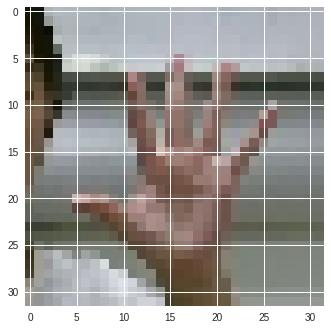

This gesture is palm


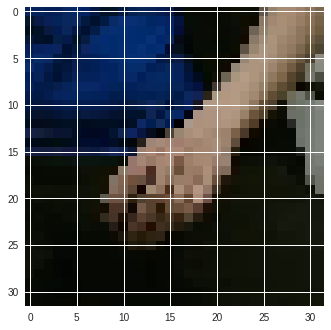

This gesture is intermidiate status


In [78]:

for demo_index in range (0,2):
  demo = X_test[demo_index]
  out = predictions_test2[demo_index]
  plt.imshow(cv2.cvtColor(image[demo_index], cv2.COLOR_BGR2RGB))
  plt.show()
  if int(round(out[0])) == 1:
    print("This gesture is palm")
  elif int(round(out[0])) == 2:
    print("This gesture is opithenar")
  elif int(round(out[0])) == 3:
    print("This gesture is fist")
  elif int(round(out[0])) == 4:
    print("This gesture is fist")
  else:
    print("This gesture is intermidiate status")
